# 196 Preliminary Work

In this notebook, we demonstrate and implement a prequential pipeline consisting of an Adaptive Random Forest (ARF) online classifier, ADWIN2 concept drift detector, and both OFS and FIRES online feature extraction and selection for comparison.

At this point, all modules used are in their default parameters.

Note: Install dependencies first via pip install -r requirements.txt

### Imports

In [1]:
# Main Imports
from skmultiflow.meta import AdaptiveRandomForestClassifier # ARF
from skmultiflow.lazy import KNNClassifier, KNNADWINClassifier # KNN
# from sklearn.svm import LinearSVC # SVM

# from skmultiflow.evaluation import EvaluatePrequential # Pipeline
# from float.pipeline import PrequentialPipeline
# from float.prediction.skmultiflow import SkmultiflowClassifier
# from float.prediction.evaluation import PredictionEvaluator

# from skmultiflow.drift_detection import ADWIN # ADWIN drift detection
from float.feature_selection import OFS, FIRES # online feature methods
from skmultiflow.data import FileStream # create stream from file
# from float.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from float.feature_selection.evaluation import FeatureSelectionEvaluator
# from float.feature_selection.evaluation.measures import nogueira_stability

# Other imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

### Data Stream

In [2]:
# Create a data stream from file
# if from dataframe, use DataStream() instead
# stream = FileStream('out.csv') # dummy dataset
data_loader = FileStream(filepath='out.csv')

### Online Feature Extraction and Selection

In [3]:
# ref_sample, _ = data_loader.get_data(50)
# data_loader.stream.reset()

# fires_fs = FIRES(n_total_features=data_loader.stream.n_features,
#                 n_selected_features=10,
#                 classes=data_loader.stream.target_values,
#                 baseline='gaussian',
#                 ref_sample=ref_sample)

# ofs_fs = OFS(n_total_features=data_loader.stream.n_features,
#             n_selected_features=10,
#             baseline='gaussian',
#             ref_sample=ref_sample)

### Evaluation Pipeline

0 reached!
1000 reached!
2000 reached!
3000 reached!
4000 reached!
5000 reached!
6000 reached!
7000 reached!
8000 reached!
9000 reached!
10000 reached!
11000 reached!
12000 reached!
13000 reached!
14000 reached!
15000 reached!
16000 reached!
17000 reached!
18000 reached!
19000 reached!
20000 reached!
21000 reached!
22000 reached!
23000 reached!
24000 reached!
25000 reached!
26000 reached!
27000 reached!
28000 reached!
29000 reached!
30000 reached!
31000 reached!
32000 reached!
33000 reached!
34000 reached!
35000 reached!
36000 reached!
37000 reached!
38000 reached!
39000 reached!
40000 reached!
41000 reached!
42000 reached!
43000 reached!
44000 reached!
45000 reached!
46000 reached!
47000 reached!
48000 reached!
49000 reached!
Adaptive Random Forest ensemble classifier example
50000 samples analyzed.
Accuracy: 0.99678
Precision: 0.9967618087886321
Recall: 0.9967851777369443
F1 Score: 0.9967734254684938


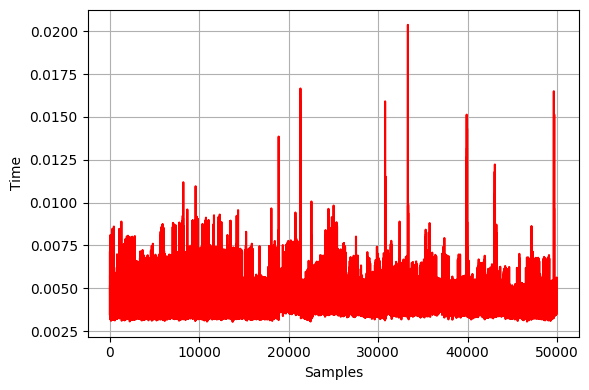

In [4]:
arf = AdaptiveRandomForestClassifier(n_estimators=7, leaf_prediction='mc', random_state=0)

# Setup variables to control loop and track performance
n_samples = 0
correct_cnt = 0
max_samples = data_loader.n_remaining_samples()

# Lists to store true and predicted labels for metric calculations
true_labels = []
pred_labels = []
acc_list = []
precision_list = []
recall_list = []
f1_list = []

avgTime_list = []


# Train the estimator with the samples provided by the data stream
# while n_samples < max_samples and data_loader.stream.has_more_samples():
while n_samples < 50000:
    if n_samples % 1000 == 0: 
        print(f"{n_samples} reached!")

    start = time.perf_counter()
    X, y = data_loader.next_sample()
    
    # Apply OFS feature selection
    # X_selected = ofs_fs.select_features(X, rng=np.random.default_rng())
    
    y_pred = arf.predict(X)
    true_labels.append(y[0])
    pred_labels.append(y_pred[0])
    if y[0] == y_pred[0]:
        correct_cnt += 1
    arf.partial_fit(X, [y[0]], classes=data_loader.get_target_values())
    n_samples += 1

    end = time.perf_counter()

    avgTime_list.append(end-start)

    # acc_list.append(accuracy)
    # precision_list.append(precision)
    # recall_list.append(recall)
    # f1_list.append(f1)

accuracy = correct_cnt / n_samples
precision = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
recall = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
f1 = f1_score(true_labels, pred_labels, average='macro', zero_division=0)

# Display results
print('Adaptive Random Forest ensemble classifier example')
print('{} samples analyzed.'.format(n_samples))
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

# plt.figure(figsize=(6, 4))

# plt.plot(acc_list, label='Accuracy', color='red', linewidth=1.5)
# plt.plot(precision_list, label='Precision', color='blue', linewidth=1.5)
# plt.plot(recall_list, label='Recall', color='orange', linewidth=1.5)
# plt.plot(f1_list, label='F1 Score', color='green', linewidth=1.5)

# plt.xlabel('Samples')
# plt.ylabel('Metric Value')
# plt.title('Precision, Recall, and F1 Score Over Time')
# plt.legend()
# plt.grid()
# # plt.ylim(0.9, 1.0)  # Set y-axis range from 0.9 to 1.0
# plt.tight_layout()
# plt.show()


plt.figure(figsize=(6, 4))

plt.plot(avgTime_list, label='Time per instance', color='red', linewidth=1.5)

plt.xlabel('Samples')
plt.ylabel('Time')
plt.grid()
# plt.ylim(0.9, 1.0)  # Set y-axis range from 0.9 to 1.0
plt.tight_layout()
plt.show()

In [5]:
sum = 0
for i in avgTime_list:
    sum += i

print(f"average time per instance: ", sum/n_samples)

average time per instance:  0.0038975345039999657


average time per instance:  0.004067118970000518

In [6]:
params = arf.get_params()
print(params)

{'binary_split': False, 'disable_weighted_vote': False, 'drift_detection_method__delta': 0.001, 'drift_detection_method': ADWIN(delta=0.001), 'grace_period': 50, 'lambda_value': 6, 'leaf_prediction': 'mc', 'max_byte_size': 33554432, 'max_features': 9, 'memory_estimate_period': 2000000, 'n_estimators': 7, 'nb_threshold': 0, 'no_preprune': False, 'nominal_attributes': None, 'performance_metric': 'acc', 'random_state': 0, 'remove_poor_atts': False, 'split_confidence': 0.01, 'split_criterion': 'info_gain', 'stop_mem_management': False, 'tie_threshold': 0.05, 'warning_detection_method__delta': 0.01, 'warning_detection_method': ADWIN(delta=0.01)}


0 reached!
1000 reached!
2000 reached!
3000 reached!
4000 reached!
5000 reached!
6000 reached!
7000 reached!
8000 reached!
9000 reached!
10000 reached!
11000 reached!
12000 reached!
13000 reached!
14000 reached!
15000 reached!
16000 reached!
17000 reached!
18000 reached!
19000 reached!
20000 reached!
21000 reached!
22000 reached!
23000 reached!
24000 reached!
25000 reached!
26000 reached!
27000 reached!
28000 reached!
29000 reached!
30000 reached!
31000 reached!
32000 reached!
33000 reached!
34000 reached!
35000 reached!
36000 reached!
37000 reached!
38000 reached!
39000 reached!
40000 reached!
41000 reached!
42000 reached!
43000 reached!
44000 reached!
45000 reached!
46000 reached!
47000 reached!
48000 reached!
49000 reached!
50000 reached!
51000 reached!
52000 reached!
53000 reached!
54000 reached!
55000 reached!
56000 reached!
57000 reached!
58000 reached!
59000 reached!
60000 reached!
61000 reached!
62000 reached!
63000 reached!
64000 reached!
65000 reached!
66000 reached!
67000 re

c:\Users\Carlo Alamani\AppData\Local\Programs\Python\Python39\lib\site-packages\skmultiflow\drift_detection\adwin.py:350: RuntimeWarning: overflow encountered in long_scalars
  self.mdbl_width += self.width


101000 reached!
102000 reached!
103000 reached!
104000 reached!
105000 reached!
106000 reached!
107000 reached!
108000 reached!
109000 reached!
110000 reached!
111000 reached!
112000 reached!
113000 reached!
114000 reached!
115000 reached!
116000 reached!
117000 reached!
118000 reached!
119000 reached!
120000 reached!
121000 reached!
122000 reached!
123000 reached!
124000 reached!
125000 reached!
126000 reached!
127000 reached!
128000 reached!
129000 reached!
130000 reached!
131000 reached!
132000 reached!
133000 reached!
134000 reached!
135000 reached!
136000 reached!
137000 reached!
138000 reached!
139000 reached!
140000 reached!
141000 reached!
142000 reached!
143000 reached!
144000 reached!
145000 reached!
146000 reached!
147000 reached!
148000 reached!
149000 reached!
KNN classifier example
150000 samples analyzed.
Accuracy: 0.35786666666666667
Precision: 0.17893333333333333
Recall: 0.5
F1 Score: 0.26355066771406127


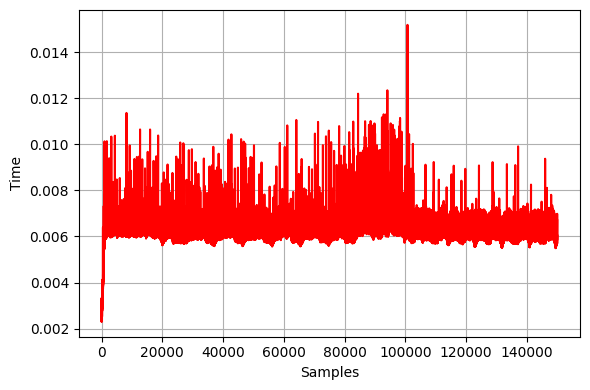

In [14]:
knn = KNNADWINClassifier(n_neighbors=3, leaf_size=40)

data_loader.restart()

# Setup variables to control loop and track performance
n_samples = 0
correct_cnt = 0
max_samples = data_loader.n_remaining_samples()

# Lists to store true and predicted labels for metric calculations
true_labels = []
pred_labels = []
acc_list = []
precision_list = []
recall_list = []
f1_list = []

avgTime_list = []


# Train the estimator with the samples provided by the data stream
# while n_samples < max_samples and data_loader.stream.has_more_samples():
while n_samples < 150000:
    if n_samples % 1000 == 0: 
        print(f"{n_samples} reached!")

    start = time.perf_counter()
    X, y = data_loader.next_sample()
    
    # Apply OFS feature selection
    # X_selected = ofs_fs.select_features(X, rng=np.random.default_rng())
    
    y_pred = arf.predict(X)
    true_labels.append(y[0])
    pred_labels.append(y_pred[0])
    if y[0] == y_pred[0]:
        correct_cnt += 1
    knn.partial_fit(X, [y[0]], classes=data_loader.get_target_values())
    n_samples += 1

    end = time.perf_counter()

    avgTime_list.append(end-start)

    # acc_list.append(accuracy)
    # precision_list.append(precision)
    # recall_list.append(recall)
    # f1_list.append(f1)

accuracy = correct_cnt / n_samples
precision = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
recall = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
f1 = f1_score(true_labels, pred_labels, average='macro', zero_division=0)

# Display results
print('KNN classifier example')
print('{} samples analyzed.'.format(n_samples))
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

# plt.figure(figsize=(6, 4))

# plt.plot(acc_list, label='Accuracy', color='red', linewidth=1.5)
# plt.plot(precision_list, label='Precision', color='blue', linewidth=1.5)
# plt.plot(recall_list, label='Recall', color='orange', linewidth=1.5)
# plt.plot(f1_list, label='F1 Score', color='green', linewidth=1.5)

# plt.xlabel('Samples')
# plt.ylabel('Metric Value')
# plt.title('Precision, Recall, and F1 Score Over Time')
# plt.legend()
# plt.grid()
# # plt.ylim(0.9, 1.0)  # Set y-axis range from 0.9 to 1.0
# plt.tight_layout()
# plt.show()


plt.figure(figsize=(6, 4))

plt.plot(avgTime_list, label='Time per instance', color='red', linewidth=1.5)

plt.xlabel('Samples')
plt.ylabel('Time')
plt.grid()
# plt.ylim(0.9, 1.0)  # Set y-axis range from 0.9 to 1.0
plt.tight_layout()
plt.show()

In [15]:
sum = 0
for i in avgTime_list:
    sum += i

print(f"average time per instance: ", sum/n_samples)

params = knn.get_params()
print(params)

average time per instance:  0.0060846612526665135
{'leaf_size': 40, 'max_window_size': 1000, 'metric': 'euclidean', 'n_neighbors': 3}
